# MINERÍA DE DATOS
## LABORATORIO SEMANA 13
### DOCENTE:  Dr. Hugo David Calderon Vilca
### INTEGRANTES:
- Blas Ruiz, Luis Aaron - 19200069
- Huarhuachi Ortega, Andrea Mariana - 19200267
- Ramos Rivas, Kevin Keyler - 19200096
- Rojas Villanueva, Paula Elianne - 19200266
- Torres Talaverano, Luz Elena - 19200294

# Análisis de Sentimiento

## Descripción de la Tercera Parte

Hasta ahora, todos los análisis que hemos realizado han sido bastante genéricos: Observar recuentos, crear diagramas de dispersión, etc. 

Cuando se trata de datos de texto, existen técnicas como el análisis de sentimientos. Para ello, consideramos lo siguiente:

1. **Módulo TextBlob:** El sentimiento de las palabras es en función a la experiencia en el dominio, puede variar en función de dónde se encuentre en una oración. Para ello, el módulo TextBlob nos permite aprovechar estas etiquetas.

2. **Etiquetas de Sentimiento:** Cada palabra en un corpus está etiquetada en términos de polaridad y subjetividad. El sentimiento de un corpus es el promedio de estos.

  - * **Polaridad**: Qué tan positiva o negativa es una palabra (-1 es muy negativo y +1 es muy positivo).
  - * **Subjetividad**: Cuánto de subjetividad u obstinada es una palabra (0 es un hecho y +1 es en gran medida una opinión).

## Rutina de Sentimiento

In [14]:
# Comenzaremos leyendo en el corpus, que conserva el orden de las palabras.
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,transcript
T1C1,original release date november wednesday add...
T1C2,original release date november wednesday con...
T1C3,original release date november wednesday fin...
T1C4,original release date november wednesday and...
T1C5,original release date november years ago go...
T1C6,original release date november wednesday att...
T1C7,original release date november at mayor walk...
T1C8,original release date november wednesday and...


In [15]:
# Añadimos los nombres de los capítulos
full_chapter = ['Wednesdays Child is Full of Woe', 'Woe is the Loneliest Number', 
                'Friend or Woe', 'Woe What A Night', 
                'You Reap What You Woe', 'Quid Pro Woe', 
                'If You Dont Woe By Now','A Murder of Woes']

data['full_chapter'] = full_chapter
data

,transcript,full_chapter
T1C1,original release date november wednesday add...,Wednesdays Child is Full of Woe
T1C2,original release date november wednesday con...,Woe is the Loneliest Number
T1C3,original release date november wednesday fin...,Friend or Woe
T1C4,original release date november wednesday and...,Woe What A Night
T1C5,original release date november years ago go...,You Reap What You Woe
T1C6,original release date november wednesday att...,Quid Pro Woe
T1C7,original release date november at mayor walk...,If You Dont Woe By Now
T1C8,original release date november wednesday and...,A Murder of Woes


In [16]:
# Recuerda que en el Terminal de Anaconda Prompt colocar el comando: python -m pip install textblob / conda install -c conda-forge textblob
!pip install textblob

Defaulting to user installation because normal site-packages is not writeable


In [17]:
# Cree funciones lambda rápidas para encontrar la polaridad y la subjetividad de cada rutina
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,full_chapter,polarity,subjectivity
T1C1,original release date november wednesday add...,Wednesdays Child is Full of Woe,0.090966,0.528523
T1C2,original release date november wednesday con...,Woe is the Loneliest Number,0.040111,0.523819
T1C3,original release date november wednesday fin...,Friend or Woe,0.112529,0.528502
T1C4,original release date november wednesday and...,Woe What A Night,0.085655,0.558125
T1C5,original release date november years ago go...,You Reap What You Woe,0.070095,0.521793
T1C6,original release date november wednesday att...,Quid Pro Woe,0.075525,0.522600
T1C7,original release date november at mayor walk...,If You Dont Woe By Now,0.009862,0.524150
T1C8,original release date november wednesday and...,A Murder of Woes,0.049515,0.565762


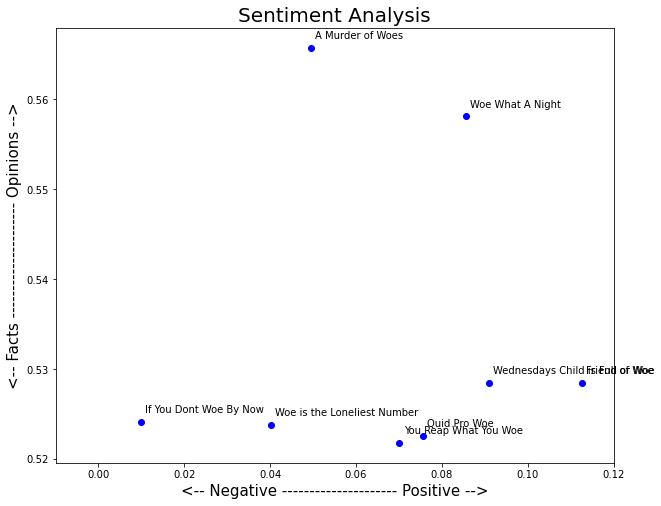

In [19]:
# Graficamos los resultados
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, chapter in enumerate(data.index):
    x = data.polarity.loc[chapter]
    y = data.subjectivity.loc[chapter]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_chapter'][index], fontsize=10)
    plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative --------------------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts --------------------- Opinions -->', fontsize=15)

plt.show()

## Rutina de Sentimiento a lo largo del tiempo

En lugar de ver el sentimiento de forma general, podemos analizar el sentimiento a lo largo del tiempo a lo largo de cada rutina.

In [20]:
# Divide cada rutina en 10 partes
import numpy as np
import math

def split_text(text, n=10):
    '''Toma una cadena de texto y la divide en n partes iguales, con un valor predeterminado de 10 partes iguales.'''

    # Calcule la longitud del texto, el tamaño de cada fragmento de texto y los puntos de inicio de cada fragmento de texto
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Extraiga fragmentos de texto del mismo tamaño y póngalos en una lista
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [21]:
# Vemos nuestros datos de nuevo
data

,transcript,full_chapter,polarity,subjectivity
T1C1,original release date november wednesday add...,Wednesdays Child is Full of Woe,0.090966,0.528523
T1C2,original release date november wednesday con...,Woe is the Loneliest Number,0.040111,0.523819
T1C3,original release date november wednesday fin...,Friend or Woe,0.112529,0.528502
T1C4,original release date november wednesday and...,Woe What A Night,0.085655,0.558125
T1C5,original release date november years ago go...,You Reap What You Woe,0.070095,0.521793
T1C6,original release date november wednesday att...,Quid Pro Woe,0.075525,0.522600
T1C7,original release date november at mayor walk...,If You Dont Woe By Now,0.009862,0.524150
T1C8,original release date november wednesday and...,A Murder of Woes,0.049515,0.565762


In [22]:
# Vamos a crear una lista para contener todas las piezas de texto
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[['original release date november\xa0\xa0 wednesday addams a highschool student finds her brother\xa0pugsley\xa0tied up in a locker she sees a psychic vision of his bullies whom she attempts to kill in revenge but gets expelled her parents\xa0morticia\xa0and\xa0gomez decide to enroll her in nevermore academy a school for outcasts meanwhile a hiker is killed by an unknown creature near nevermore wednesdays parents release\xa0thing a sentient disembodied hand to watch over her she meets her roommate enid her complete opposite and duels with bianca the popular girl after she bullies another boy rowan later wednesday is nearly killed by a falling gargoyle but is saved by biancas exboyfriend xavier after escaping her courtordered therapy session wednesday meets tyler who agrees to help her escape from nevermore however she is apprehended by principal larissa weems and taken back to the school later tyler and wednesday meet at the local fair and wednesday has a vision of rowans death rowan a

In [26]:
# La lista tiene 8 elementos, uno para cada transcripción.
len(list_pieces)

8

In [27]:
# Cada transcripción se ha dividido en 10 piezas de texto.
len(list_pieces[0])

10

In [28]:
# Calcular la polaridad de cada fragmento de texto

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.14146341463414633,
  0.23812425163488993,
  0.10963654401154402,
  0.12541099773242628,
  0.05042989417989418,
  -0.0188888888888889,
  0.01964472309299896,
  0.12824582824582828,
  0.09160561660561659,
  -0.050986700986700995],
 [0.020546737213403894,
  0.10631313131313133,
  -0.0556156462585034,
  0.04762073863636363,
  0.1723884448884449,
  -0.08529368358913815,
  -0.0423532196969697,
  0.00396274250440916,
  0.15111016628873772,
  0.06738591269841263],
 [0.09545794075205842,
  0.07643458393458394,
  0.18802437641723357,
  0.32689909297052155,
  0.04380952380952383,
  0.07976190476190478,
  0.16896551724137931,
  0.12389713461142032,
  0.05693889443889447,
  -0.10793010752688172],
 [0.06128566773728064,
  0.1669871794871795,
  0.1652647488013342,
  0.02575396825396825,
  0.01871311558811558,
  0.1824820788530466,
  0.12280057413036136,
  0.011111111111111112,
  0.09698072562358277,
  -0.03262987012987013],
 [0.13722358722358718,
  0.07291106041106041,
  0.08894480519480519,
  0.

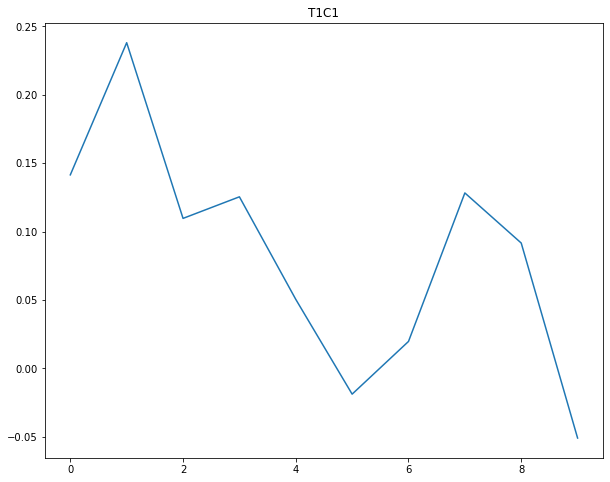

In [29]:
# Mostrar la trama del primer capítulo de la serie
plt.plot(polarity_transcript[0])
plt.title(data['full_chapter'].index[0])
plt.show()

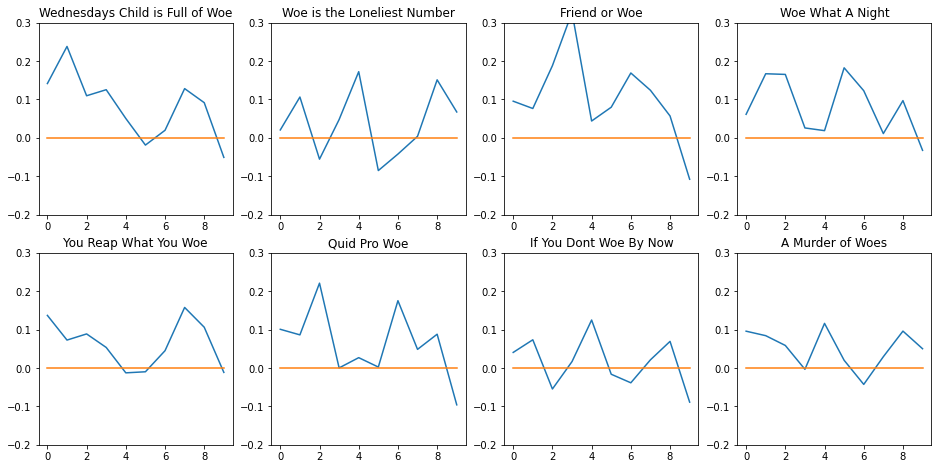

In [30]:
# Mostramos la trama para todos los capítulos
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_chapter'][index])
    plt.ylim(bottom=-.2, top=.3)
    
plt.show()

- Tanto en el capítulo 2 como en el capítulo 8 finalizan positivamente. 

- Por otro lado, los demás capítulos, en especial los capítulos 3, 6 y 7 tienen algunos patrones relativamente semejantes ya que al final poseen momentos bajos.